# Customizing colorbars in cartoee

In [1]:
import ee
import cartoee as cee
import cartopy.crs as ccrs

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ee.Initialize()

### Creating a map with a colorbar

`Cartoee` provides a simple way to create a map from EE, however, the visualization parameters one passes to EE do not directly correspond to matplotlib. To accomidate the difference and make it simple to user, `cartoee` has a function `addColorbar()` that takes a mixture of EE and matplotlib parameters. Let's see some examples.

In [3]:
# get an earth engine image
srtm = ee.Image("CGIAR/SRTM90_V4")

In [4]:
# specify visualization parameters and region to map
# *note: the visualization variable is what EE takes to visualize the data
visualization = {'min':-500,'max':3000,'bands':'elevation'}
bbox = [-180,-90,180,90]

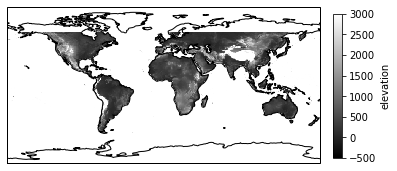

In [5]:
# plot the result using cartoee
ax = cee.getMap(srtm,cmap='gray',region=bbox,visParams=visualization)
cb = cee.addColorbar(ax,loc='right',cmap='gray',visParams=visualization)

ax.coastlines()
plt.show()

So, here we created a map of SRTM data and added a colorbar. Simple enough, right? Earth Engine will default to a grayscale colormap if no palette is given. Matplotlib, on the other hand, uses the viridis colormap. When using cartoee, it is be to simply be explicit when it comes to the cmap keyword (helps you make sure the map and colorbar are the same).

Now let's see an example with a custom palette that is not available in the matplotlib's arsenal of colormaps.

### Playing with colorbars

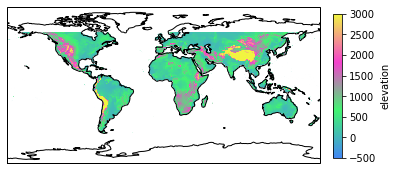

In [6]:
# visualization parameters with an extremely wacky palette
visualization = {'min':-500,'max':3000,'bands':'elevation',
                 'palette':'#4286f4,#41f471,#f441cd,#f1f441'}

# plot the result using cartoee
# *note: cartoee will not let you plot the data if cmap is specify with
#        a palette in the visParams 
ax = cee.getMap(srtm,region=bbox,visParams=visualization)
cb = cee.addColorbar(ax,loc='right',visParams=visualization)

ax.coastlines()
plt.show()

In this example we provided a custom colormap as a comma-seprated string of hex color codes in the visualization dictionary with the palette key. When we pass the visualization parameters into the `addColorbar` function we get that palette as a nice colorbar.

We can also make discrete colorbars...let's see how that works.

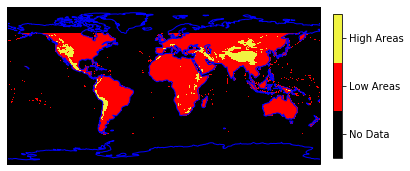

In [7]:
# classify the SRTM image into 3 classes, nodata, <=1500, and >1500
classified = ee.Image(0).where(srtm.lte(1500),1)\
                        .where(srtm.gt(1500),2)
    
# visualization parameters with 3 colors in the palette
visualization = {'min':0,'max':2,'palette':'#000000,#FF0000,#f1f441'}

ax = cee.getMap(classified,region=bbox,visParams=visualization)
# create a colorbar but set the discrete keyword to true for categorical data
cb = cee.addColorbar(ax,loc='right',visParams=visualization,discrete=True)

# customize where the ticks are on the colorbar
cb.set_ticks([0.333,0.9999,1.666])
# and set custom labels
cb.set_ticklabels(['No Data','Low Areas','High Areas'])

ax.coastlines(color='blue')
plt.show()

### Colorbar positioning

There are many more fun things you can do with the colors but what about position? Yes, you can select a position to display to colorbar. Or, better yet bring your own location

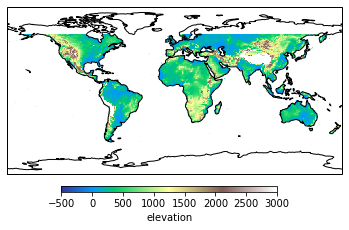

In [8]:
# going back to the original visualization parameters
visualization = {'min':-500,'max':3000,'bands':'elevation'}

# plot the result using cartoee
ax = cee.getMap(srtm,cmap='terrain',region=bbox,visParams=visualization)
# create the colorbar but set the location to bottom
cb = cee.addColorbar(ax,loc='bottom',cmap='terrain',visParams=visualization,
                     orientation='horizontal')

ax.coastlines()
plt.show()

`Cartoee` comes with predetermined locations for the colorbars ('left', 'right', 'bottom', and 'top') to help make it easy for users to create a plot. Sometimes you just want to put something where you want it when really customizing map, and you can.

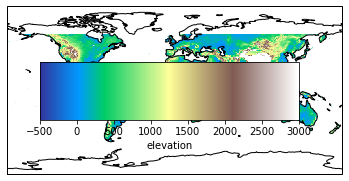

In [9]:
# plot the result using cartoee
ax = cee.getMap(srtm,cmap='terrain',region=bbox,visParams=visualization)

# create a new axes to add the colorbar to in the middle of the map
cax = ax.figure.add_axes([0.2,0.4,0.6,0.2])

# create the colorbar but set the cax keyword
cb = cee.addColorbar(ax,cax=cax,cmap='terrain',visParams=visualization,
                     orientation='horizontal')

ax.coastlines()
plt.show()

This is obviously a joke to demostrate that you can add the colorbar wherever you would like. This gives you the basics of colorbars in cartoee which allows users to do more fun things and make custom publication quality maps with EE!